<a href="https://colab.research.google.com/github/muhammadbabarkamal/BabarKamal/blob/main/MLProject_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from statistics import mean
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# read train data 
Train_data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/house-prices/train.csv", index_col="Id")
Train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [ ]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
null_rows = Train_data.shape[0] - Train_data.dropna(axis=0).shape[0]
null_rows

1460

In [ ]:
# read test data
Test_data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/house-prices/test.csv", index_col="Id")
Test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [ ]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [ ]:
# calc. number of rows that contain null 
null_rowsT = Test_data.shape[0] - Test_data.dropna(axis=0).shape[0]
null_rowsT

1459

In [ ]:
# Join all the data together (train + test)
All_Data = pd.concat([Train_data, Test_data])
All_Data.drop('SalePrice', axis=1, inplace=True)
All_Data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [ ]:
All_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

#Preprocessing Data
• Handling Missing Values
We can see that number of columns that contain null values in train data equal total number of samples, so we can't drop rows that contain null.
We will keep columns that have null values <= 5% and discard any column that has null values > 5%

In [ ]:
# drop nulls at specefic percentage
percent = 5
min_count =  int( ((100-percent)/100) * All_Data.shape[0] )
print("Columns that have No Null values less than ", min_count," will drop it")
print("--"*25 )
All_Data.dropna(axis=1, thresh=min_count).info()

Columns that have No Null values less than  2773  will drop it
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   Utilities      2917 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-nu

In [ ]:
# from above we can know features that have missing > 5% and we will drop it 
# and features that have missing <= 5% to handle all of them

features_to_drop = []
features_to_impute = []

#to check for num of nulls depend on the determined percentage of the error
checkCond_Null = All_Data.shape[0] - min_count 

# loop to check percent in each columns
for c in All_Data.columns:
    if All_Data[c].isnull().sum() > checkCond_Null:
        features_to_drop.append(c)
    elif (All_Data[c].isnull().sum() <= checkCond_Null) & (All_Data[c].isnull().sum()!= 0.0):
        features_to_impute.append(c)

print("- We have ",len(features_to_impute),"features have small missing values in it. These columns are :\n\n", features_to_impute)
print('\n','--'*30,'\n')
print("- We have ",len(features_to_drop),"features have alot of missing values in it. These columns are :\n\n",features_to_drop)

- We have  23 features have small missing values in it. These columns are :

 ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']

 ------------------------------------------------------------ 

- We have  11 features have alot of missing values in it. These columns are :

 ['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
All_Data.shape

(2919, 79)

In [ ]:
# Drop features that have missing ratio > 10%
All_Data = All_Data.drop(features_to_drop, axis=1)
All_Data.shape

(2919, 68)

Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset.

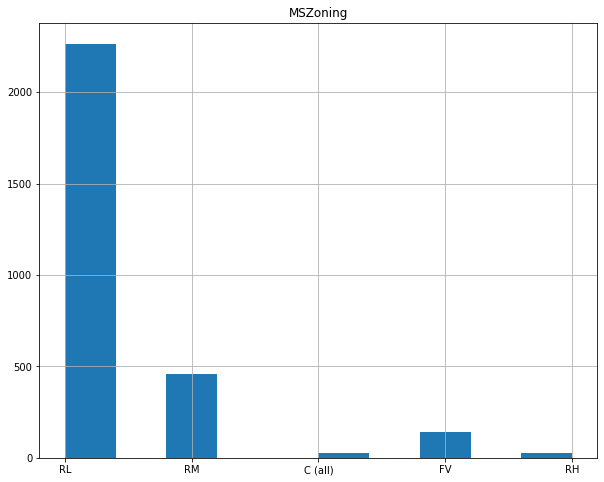

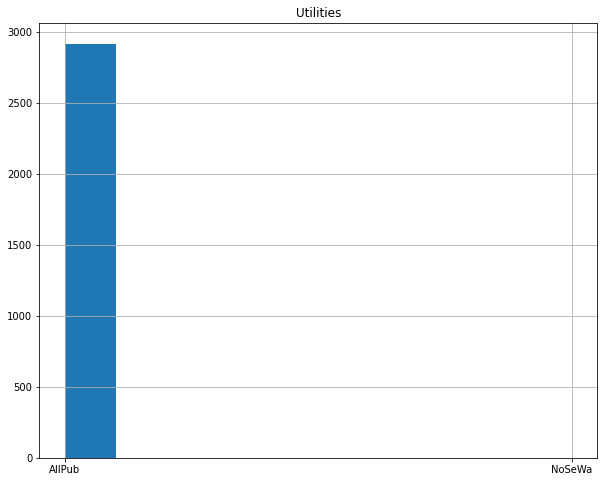

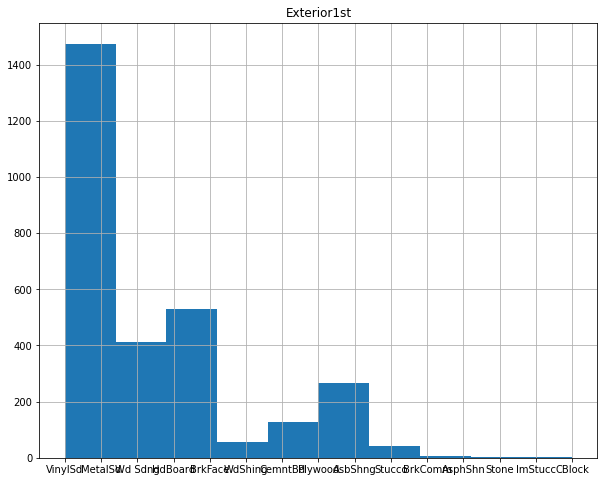

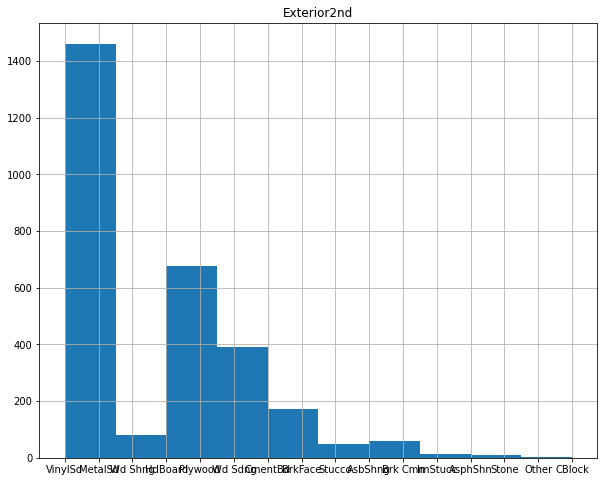

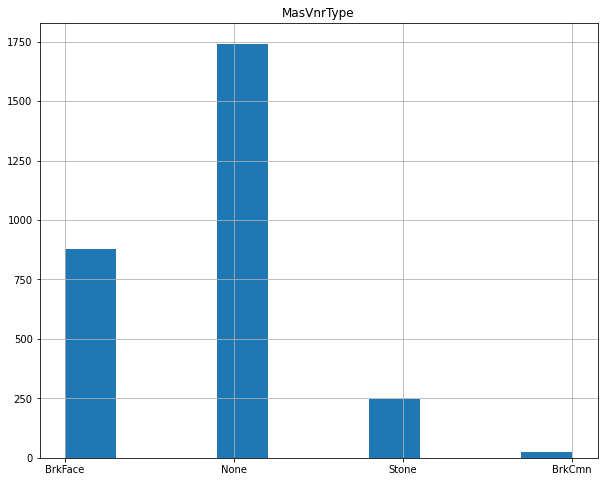

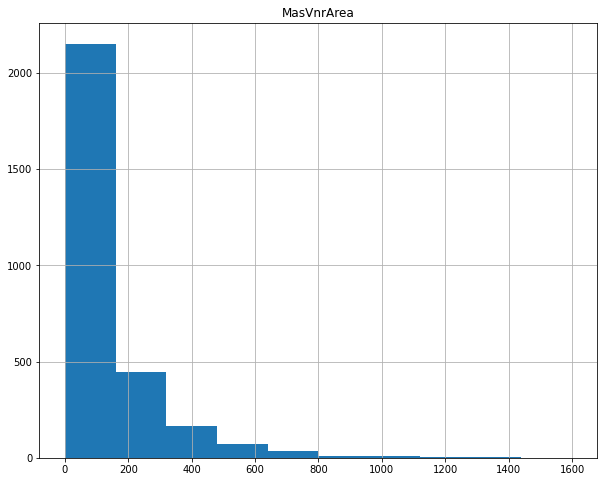

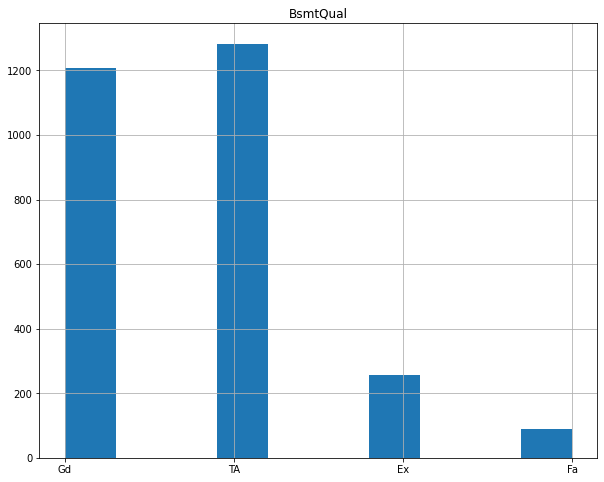

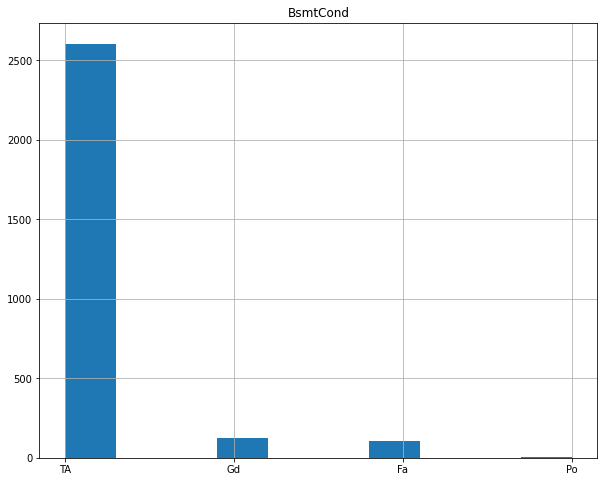

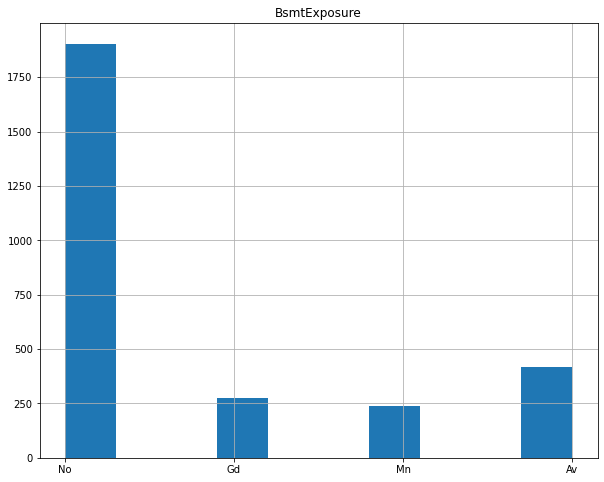

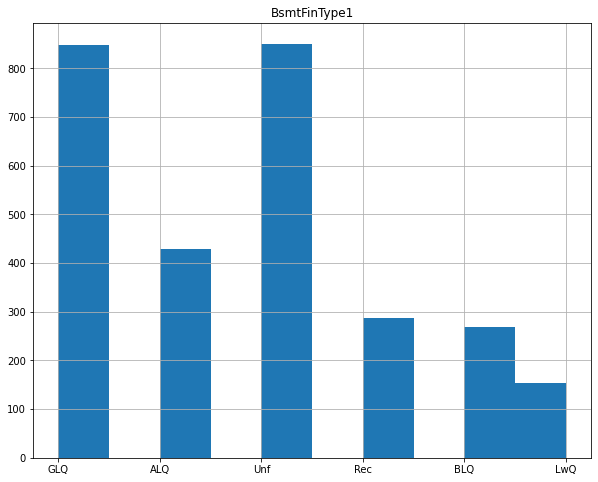

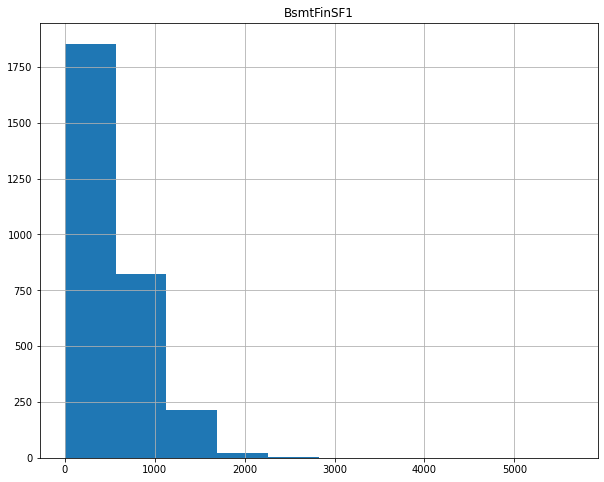

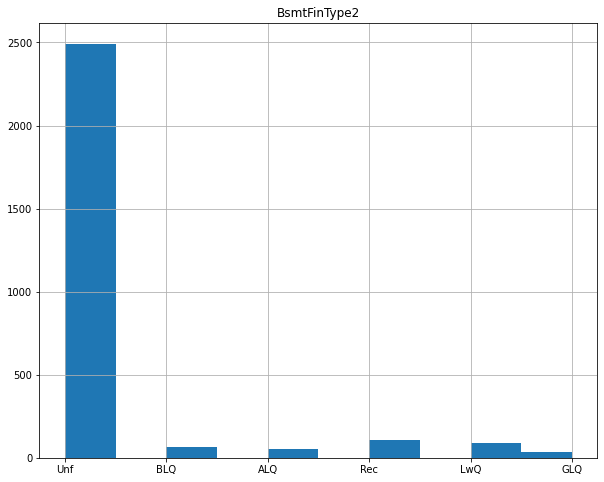

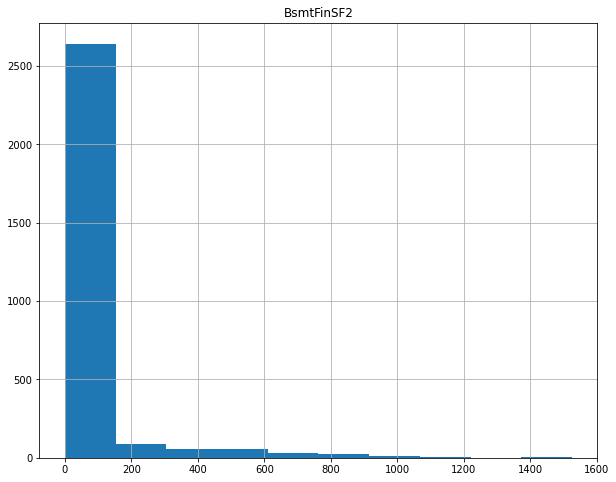

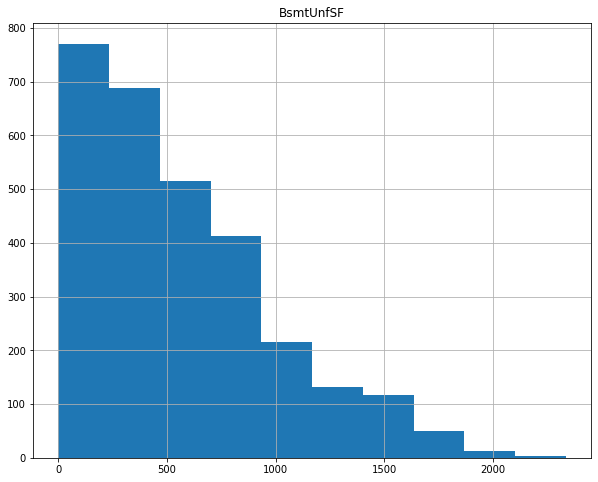

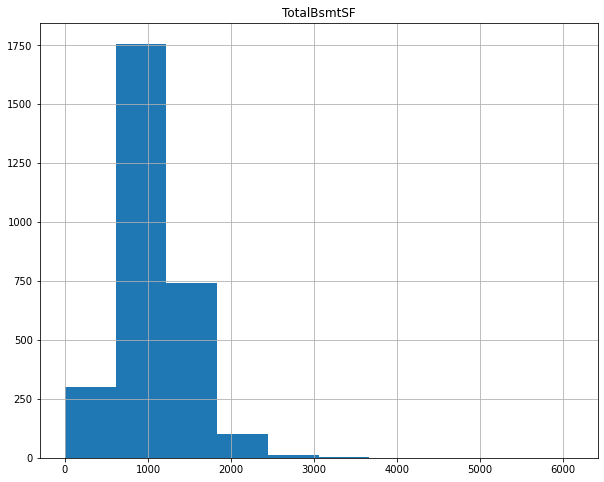

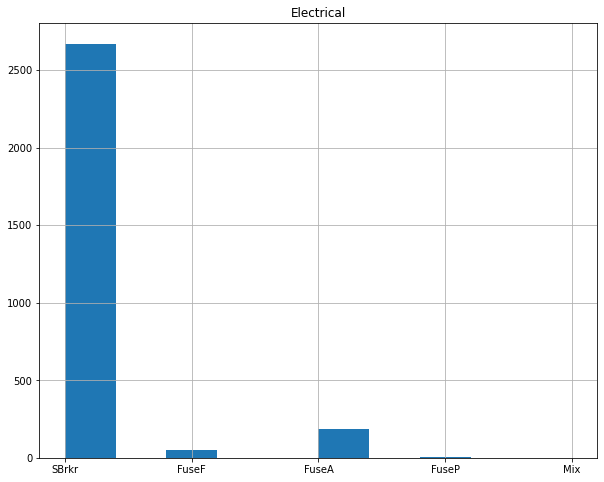

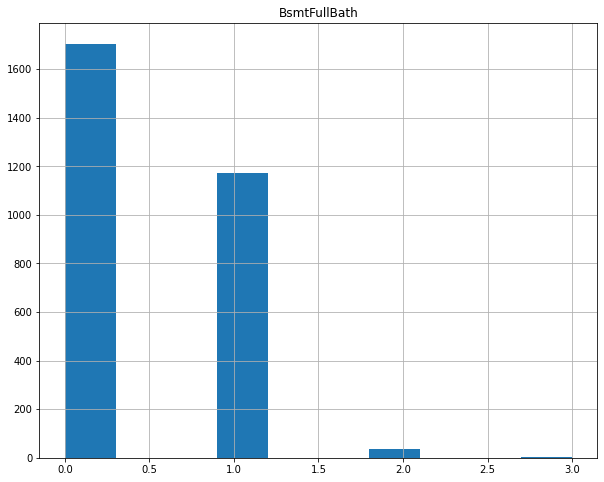

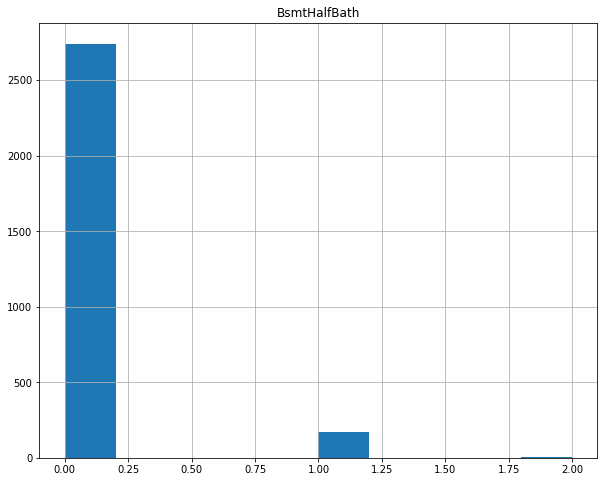

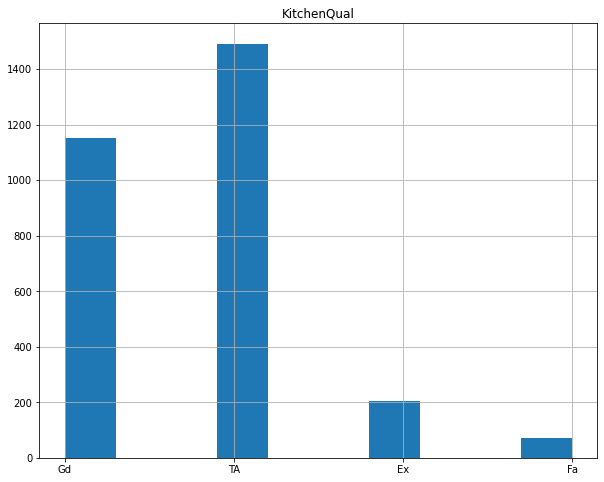

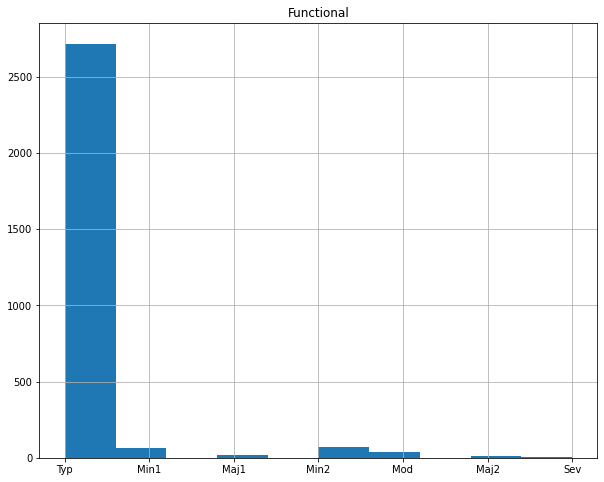

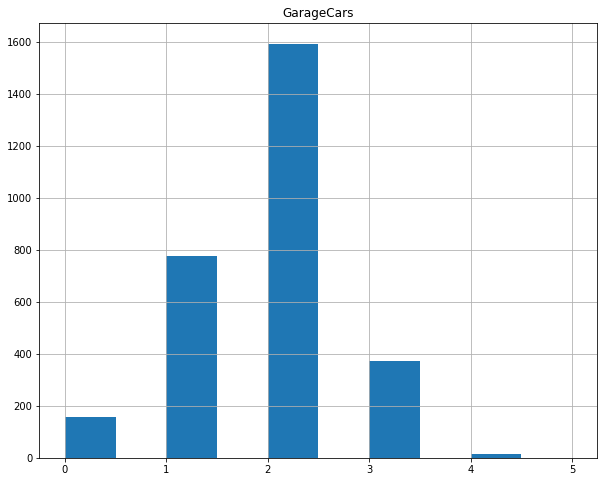

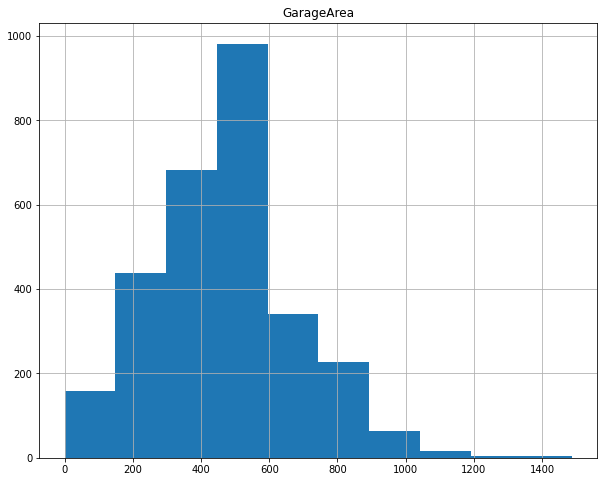

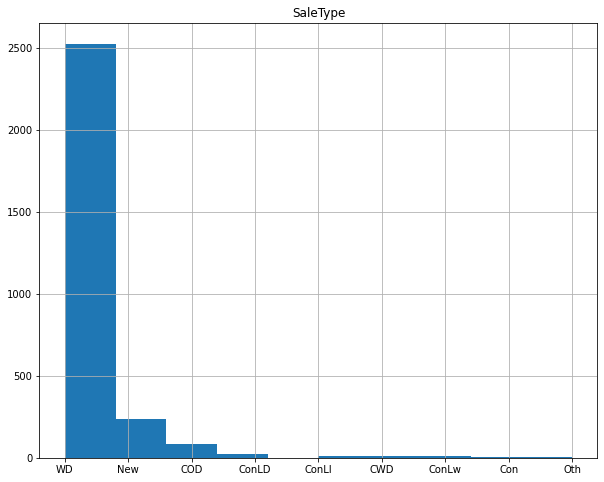

In [ ]:
# Histograms of feature columns that we will impute
for c in features_to_impute:
    plt.figure(figsize=(10,8))
    All_Data[c].hist()
    plt.title(c)
    plt.show()

In [ ]:
# impute missing data 
def Imput_Missing_Value(Data, features_to_impute):
    for i in features_to_impute:
        #for a categorical variable imputation, we can impute with the most frequent categorical value.
        if Data[i].dtype == 'object': 
            Data[i] = Data[i].fillna(Data[i].mode()[0])
        # we will impute numerical feature with mean
        else: 
            Data[i]=Data[i].fillna(Data[i].mean())
    return Data

In [ ]:
All_Data = Imput_Missing_Value(All_Data, features_to_impute)
All_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   Utilities      2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

In [ ]:
#Check if there are null values or not 
All_Data.isnull().sum().max()
# equal 0 means there is no missing values in the data :)

0

In [ ]:
# correlation of training data
corr_Matrix = Train_data.corr()
#corr_Matrix
corr_Matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

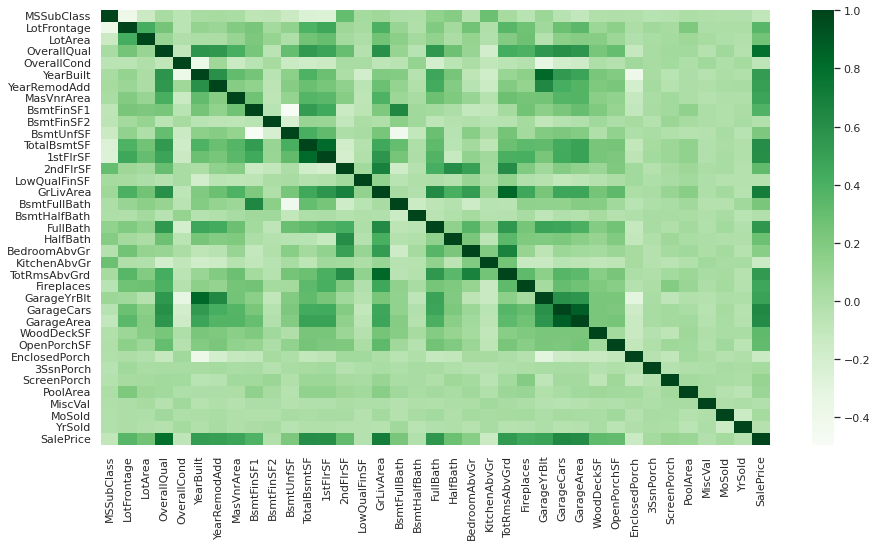

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_Matrix,cmap="Greens")  # corr_Matrix = Train_data.corr()

In [ ]:
Train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
Columns_Enc_OneHot = ['MSZoning' ,'LandContour' ,'LotConfig','LandSlope','RoofStyle','RoofMatl','Exterior1st','MasVnrType','Heating']
Columns_Enc_Ordinal = ['Street','LotShape','Utilities','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Electrical','KitchenQual','PavedDrive','SaleCondition','SaleType'] 

In [ ]:
All_Data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,6,2006,WD,Normal
2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,0,0,9,2006,WD,Abnorml


- OneHotEncoding

In [ ]:
# One Hot Encoding for train data
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse = False)
housing_caterogy_onehot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(All_Data[Columns_Enc_OneHot]))
housing_caterogy_onehot_encoded.columns = one_hot_encoder.get_feature_names_out(Columns_Enc_OneHot)
housing_caterogy_onehot_encoded.index = np.arange(1, len(All_Data)+1)                
housing_caterogy_onehot_encoded

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2916,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2917,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2918,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# replace categorical features with its encoding so remove old features
All_Data.drop(Columns_Enc_OneHot, axis=1, inplace=True)
All_Data

,MSSubClass,LotArea,Street,LotShape,Utilities,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,Pave,Reg,AllPub,CollgCr,Norm,Norm,1Fam,2Story,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,9600,Pave,Reg,AllPub,Veenker,Feedr,Norm,1Fam,1Story,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,11250,Pave,IR1,AllPub,CollgCr,Norm,Norm,1Fam,2Story,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,9550,Pave,IR1,AllPub,Crawfor,Norm,Norm,1Fam,2Story,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,14260,Pave,IR1,AllPub,NoRidge,Norm,Norm,1Fam,2Story,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,1936,Pave,Reg,AllPub,MeadowV,Norm,Norm,Twnhs,2Story,...,0,0,0,0,0,0,6,2006,WD,Normal
2916,160,1894,Pave,Reg,AllPub,MeadowV,Norm,Norm,TwnhsE,2Story,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2917,20,20000,Pave,Reg,AllPub,Mitchel,Norm,Norm,1Fam,1Story,...,0,0,0,0,0,0,9,2006,WD,Abnorml


In [ ]:
# Add Encoding features in the dataframe
All_Data = pd.concat([All_Data, housing_caterogy_onehot_encoded], axis=1)
All_Data

,MSSubClass,LotArea,Street,LotShape,Utilities,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
1,60,8450,Pave,Reg,AllPub,CollgCr,Norm,Norm,1Fam,2Story,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,20,9600,Pave,Reg,AllPub,Veenker,Feedr,Norm,1Fam,1Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,60,11250,Pave,IR1,AllPub,CollgCr,Norm,Norm,1Fam,2Story,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70,9550,Pave,IR1,AllPub,Crawfor,Norm,Norm,1Fam,2Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,60,14260,Pave,IR1,AllPub,NoRidge,Norm,Norm,1Fam,2Story,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,1936,Pave,Reg,AllPub,MeadowV,Norm,Norm,Twnhs,2Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2916,160,1894,Pave,Reg,AllPub,MeadowV,Norm,Norm,TwnhsE,2Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2917,20,20000,Pave,Reg,AllPub,Mitchel,Norm,Norm,1Fam,1Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2918,85,10441,Pave,Reg,AllPub,Mitchel,Norm,Norm,1Fam,SFoyer,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


 OrdinalEncoding

Ordinal number
In set theory, an ordinal number, or ordinal, is a generalization of ordinal numerals aimed to extend enumeration to infinite sets. An enumeration process of a finite collection consists of labeling successively each element with the least natural number that has not been previously used

encoding is used when the variables in the data are ordinal, ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels.

In [ ]:
 
 # Ordinal Encoding 
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
All_Data[Columns_Enc_Ordinal] = pd.DataFrame(ordinal_encoder.fit_transform(All_Data[Columns_Enc_Ordinal]))
All_Data

,MSSubClass,LotArea,Street,LotShape,Utilities,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
1,60,8450,1.0,3.0,0.0,CollgCr,Norm,Norm,1Fam,2Story,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,20,9600,1.0,0.0,0.0,Veenker,Feedr,Norm,1Fam,1Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,60,11250,1.0,0.0,0.0,CollgCr,Norm,Norm,1Fam,2Story,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70,9550,1.0,0.0,0.0,Crawfor,Norm,Norm,1Fam,2Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,60,14260,1.0,0.0,0.0,NoRidge,Norm,Norm,1Fam,2Story,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,1936,1.0,3.0,0.0,MeadowV,Norm,Norm,Twnhs,2Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2916,160,1894,1.0,3.0,0.0,MeadowV,Norm,Norm,TwnhsE,2Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2917,20,20000,1.0,3.0,0.0,Mitchel,Norm,Norm,1Fam,1Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2918,85,10441,1.0,3.0,0.0,Mitchel,Norm,Norm,1Fam,SFoyer,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
All_Data['Utilities']

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
2915    0.0
2916    0.0
2917    0.0
2918    0.0
2919    NaN
Name: Utilities, Length: 2919, dtype: float64

In [ ]:
# drop some features that is redendent
features_throw = ['Neighborhood','Condition1','Condition2','BldgType','HouseStyle','Exterior2nd','ExterQual','Functional']
All_Data.drop(features_throw, axis=1, inplace=True)
All_Data

,MSSubClass,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
1,60,8450,1.0,3.0,0.0,7,5,2003,2003,196.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,20,9600,1.0,0.0,0.0,6,8,1976,1976,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,60,11250,1.0,0.0,0.0,7,5,2001,2002,162.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70,9550,1.0,0.0,0.0,7,5,1915,1970,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,60,14260,1.0,0.0,0.0,8,5,2000,2000,350.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,1936,1.0,3.0,0.0,4,7,1970,1970,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2916,160,1894,1.0,3.0,0.0,4,5,1970,1970,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2917,20,20000,1.0,3.0,0.0,5,7,1960,1996,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2918,85,10441,1.0,3.0,0.0,5,5,1992,1992,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# to sure that we didn't have any null 
All_Data.fillna(0, inplace=True)

In [ ]:
All_Data

,MSSubClass,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
1,60,8450,1.0,3.0,0.0,7,5,2003,2003,196.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,20,9600,1.0,0.0,0.0,6,8,1976,1976,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,60,11250,1.0,0.0,0.0,7,5,2001,2002,162.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70,9550,1.0,0.0,0.0,7,5,1915,1970,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,60,14260,1.0,0.0,0.0,8,5,2000,2000,350.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,1936,1.0,3.0,0.0,4,7,1970,1970,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2916,160,1894,1.0,3.0,0.0,4,5,1970,1970,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2917,20,20000,1.0,3.0,0.0,5,7,1960,1996,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2918,85,10441,1.0,3.0,0.0,5,5,1992,1992,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Check type of all features 
All_Data.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 107 columns):
 #    Column               Dtype  
---   ------               -----  
 0    MSSubClass           int64  
 1    LotArea              int64  
 2    Street               float64
 3    LotShape             float64
 4    Utilities            float64
 5    OverallQual          int64  
 6    OverallCond          int64  
 7    YearBuilt            int64  
 8    YearRemodAdd         int64  
 9    MasVnrArea           float64
 10   ExterCond            float64
 11   Foundation           float64
 12   BsmtQual             float64
 13   BsmtCond             float64
 14   BsmtExposure         float64
 15   BsmtFinType1         float64
 16   BsmtFinSF1           float64
 17   BsmtFinType2         float64
 18   BsmtFinSF2           float64
 19   BsmtUnfSF            float64
 20   TotalBsmtSF          float64
 21   HeatingQC            float64
 22   CentralAir           float64
 23   Electrical 

In [ ]:
train_samples = len(Train_data)
train_samples

1460

In [ ]:
# Return data to train and test
Train_Data_new = All_Data[:train_samples]
Train_Data_new

Test_Data_new = All_Data[train_samples:]
Test_Data_new

,MSSubClass,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
1461,20,11622,1.0,0.0,0.0,5,6,1961,1961,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1462,20,14267,1.0,0.0,0.0,6,6,1958,1958,108.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1463,60,13830,1.0,0.0,0.0,5,5,1997,1998,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1464,60,9978,1.0,0.0,0.0,6,6,1998,1998,20.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1465,120,5005,1.0,0.0,0.0,8,5,1992,1992,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,1936,1.0,3.0,0.0,4,7,1970,1970,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2916,160,1894,1.0,3.0,0.0,4,5,1970,1970,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2917,20,20000,1.0,3.0,0.0,5,7,1960,1996,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2918,85,10441,1.0,3.0,0.0,5,5,1992,1992,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
Train_Data_new

,MSSubClass,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
1,60,8450,1.0,3.0,0.0,7,5,2003,2003,196.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,20,9600,1.0,0.0,0.0,6,8,1976,1976,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,60,11250,1.0,0.0,0.0,7,5,2001,2002,162.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70,9550,1.0,0.0,0.0,7,5,1915,1970,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,60,14260,1.0,0.0,0.0,8,5,2000,2000,350.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,1.0,3.0,0.0,6,5,1999,2000,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1457,20,13175,1.0,3.0,0.0,6,6,1978,1988,119.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1458,70,9042,1.0,3.0,0.0,7,9,1941,2006,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1459,20,9717,1.0,3.0,0.0,5,6,1950,1996,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Check if there are null values or not 
Test_Data_new.isnull().sum().max()

0

In [ ]:
Train_data_Y = Train_data[['SalePrice']].reset_index().drop('Id',axis=1)
Train_data_Y.index = np.arange(1, len(Train_Data_new)+1)   
Train_data_Y

,SalePrice
1,208500
2,181500
3,223500
4,140000
5,250000
...,...
1456,175000
1457,210000
1458,266500
1459,142125


In [ ]:
Train_Data_new = pd.concat([Train_Data_new, Train_data_Y],axis=1)
Train_Data_new

,MSSubClass,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SalePrice
1,60,8450,1.0,3.0,0.0,7,5,2003,2003,196.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,208500
2,20,9600,1.0,0.0,0.0,6,8,1976,1976,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,181500
3,60,11250,1.0,0.0,0.0,7,5,2001,2002,162.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,223500
4,70,9550,1.0,0.0,0.0,7,5,1915,1970,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,140000
5,60,14260,1.0,0.0,0.0,8,5,2000,2000,350.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,1.0,3.0,0.0,6,5,1999,2000,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,175000
1457,20,13175,1.0,3.0,0.0,6,6,1978,1988,119.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,210000
1458,70,9042,1.0,3.0,0.0,7,9,1941,2006,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,266500
1459,20,9717,1.0,3.0,0.0,5,6,1950,1996,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,142125


In [ ]:
# Correlation matrix of training data after preprocessing
corr_Matrix = Train_Data_new.corr()
#corr_Matrix
corr_Matrix['SalePrice'].sort_values(ascending=False)

SalePrice              1.000000
OverallQual            0.790982
GrLivArea              0.708624
GarageCars             0.640409
GarageArea             0.623431
                         ...   
Exterior1st_Wd Sdng   -0.158619
Exterior1st_MetalSd   -0.167068
RoofStyle_Gable       -0.224744
MSZoning_RM           -0.288065
MasVnrType_None       -0.367456
Name: SalePrice, Length: 108, dtype: float64

#Split Data to train and validation

In [ ]:
# divide data 20% for the validation
Train, Test = train_test_split(Train_Data_new, test_size=0.2, random_state=42)

In [ ]:
# Split train data for features and the target 
Train_y = Train['SalePrice'] 
Train_x = Train.drop(['SalePrice'], axis=1)

In [ ]:
# Split validation data for features and the target 
Test_y = Test['SalePrice'] 
Test_x = Test.drop(['SalePrice'], axis=1)

#Build ML Models

```
 Random Forest
 Linear Regression
```

Root Mean Squared Error or RMSE
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model.

In [ ]:
parameters_values = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0]

In [ ]:
# Random Forest Regressor
mRF = RandomForestRegressor()
mRF.fit(Train_x, Train_y)
r_sq_mRF = mRF.score(Train_x, Train_y)
print("SCORE :",r_sq_mRF)
pred_mRF = mRF.predict(Test_x)
MSE_mRF = mean_squared_error(np.log(Test_y), np.log(pred_mRF))
RMSE_mRF = math.sqrt(MSE_mRF)
print("RMSE :",RMSE_mRF)

SCORE : 0.9783429800647467
RMSE : 0.15538813504659563


In [ ]:
# LinearRegression Model
################
# Create a model
model = LinearRegression()
# Fit the model
model.fit(Train_x, Train_y)
# Get the R-squared
r_sq = model.score(Train_x, Train_y)
print("SCORE :",r_sq)
pred = model.predict(Test_x)
MSE = mean_squared_error(np.log(Test_y), np.log(pred))
RMSE = math.sqrt(MSE)
print("RMSE :",RMSE)

SCORE : 0.8664886065676972
RMSE : 0.1927871687965811


In [ ]:
# ElasticNet Model
################
RMSE_ElasticNet = []
for i in parameters_values:
    # Create a model
    ElasticNet_model = make_pipeline(StandardScaler(), linear_model.ElasticNet(alpha=i, l1_ratio=0.1))
    # Fit the model
    ElasticNet_model.fit(Train_x, Train_y)
    # Get the R-squared
    print("SCORE :",ElasticNet_model.score(Train_x, Train_y))
    ElasticNet_pred = ElasticNet_model.predict(Test_x)
    MSE = mean_squared_error(np.log(Test_y), np.log(ElasticNet_pred))
    RMSE_ElasticNet.append(math.sqrt(MSE))
print("RMSE :",RMSE_ElasticNet)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.652e+11, tolerance: 6.967e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


SCORE : 0.8664886022921915


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.654e+11, tolerance: 6.967e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


SCORE : 0.8664885676539333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.660e+11, tolerance: 6.967e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


SCORE : 0.8664881349529905


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.664e+11, tolerance: 6.967e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


SCORE : 0.8664841957959435
SCORE : 0.8664422891408881
SCORE : 0.8661287588181822
SCORE : 0.8637618158225153
SCORE : 0.8537778970546921
SCORE : 0.8189847187580026
SCORE : 0.7388411087882074
RMSE : [0.189961728134523, 0.1899397029806252, 0.18984605116229414, 0.18951383343708586, 0.18836646117113204, 0.18552025725758622, 0.17841934732095838, 0.16801132126954715, 0.162678143755627, 0.1952891721264218]


In [ ]:
RMSE_ElasticNet_AVG = mean(RMSE_ElasticNet)
RMSE_ElasticNet_AVG

0.18375460186158007

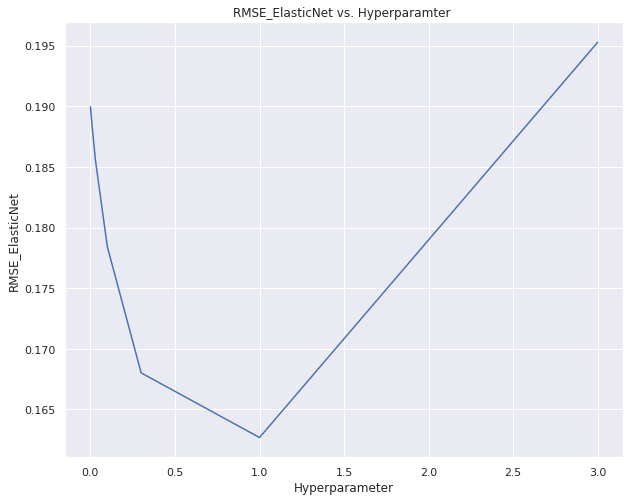

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(parameters_values, RMSE_ElasticNet)
plt.xlabel("Hyperparameter")
plt.ylabel("RMSE_ElasticNet")
plt.title("RMSE_ElasticNet vs. Hyperparamter ")
plt.show()

Predict Test Data

In [ ]:
ElasticNet

In [ ]:
# Test Model on the Test data
predicted_prices = ElasticNet_model.predict(Test_Data_new)
print("Predicted Prices :",predicted_prices)

Predicted Prices : [135088.49897577 167908.41446148 188447.84091758 ... 188471.85239742
 117686.1359855  219046.60101333]


Random Forest

In [ ]:
# Test Model on the Test data
predicted_prices = pred_mRF = mRF.predict(Test_Data_new)
print("Predicted Prices :",predicted_prices)

Predicted Prices : [130148.   158887.   173412.9  ... 159855.24 115616.54 230706.99]
